In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load the dataset

In [4]:
Processed_Flipdata = pd.read_excel('Processed_Flipdata.xlsx')

# Display the first few rows of the dataset

In [6]:
Processed_Flipdata.head(5)

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


# Display the last few rows of the dataset

In [8]:
Processed_Flipdata.tail(5)

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,5998
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,9990
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core",38999
540,642,OPPO A77,Sky Blue,128,4,5000,50MP,8MP,0,16.66,Mediatek Helio G35,15999


# 2. Data Preprocessing:

In [10]:
Processed_Flipdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 50.8+ KB


In [12]:
Processed_Flipdata.shape

(541, 12)

In [14]:
Processed_Flipdata.columns

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_',
       'Prize'],
      dtype='object')

In [16]:
Processed_Flipdata.describe()

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,289.711645,110.550832,5.397412,4871.587800,0.062847,16.431201,16228.375231
std,182.359185,60.600694,1.984923,780.148862,0.242911,2.523553,10793.588322
min,0.000000,16.000000,2.000000,800.000000,0.000000,4.500000,920.000000
25%,135.000000,64.000000,4.000000,5000.000000,0.000000,16.510000,9290.000000
50%,273.000000,128.000000,6.000000,5000.000000,0.000000,16.710000,13499.000000
75%,434.000000,128.000000,8.000000,5000.000000,0.000000,16.940000,19280.000000
max,642.000000,256.000000,8.000000,7000.000000,1.000000,41.940000,80999.000000


In [18]:
Processed_Flipdata.isnull().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

In [20]:
Processed_Flipdata.duplicated().sum()

0

In [22]:
Processed_Flipdata=Processed_Flipdata.drop(['Unnamed: 0'], axis=1)

In [24]:
Processed_Flipdata.head(5)

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


In [26]:
Processed_Flipdata['Front Camera'] = Processed_Flipdata['Front Camera'].apply(lambda x: int(x[:-2]))

In [28]:
Processed_Flipdata['Rear Camera'] = Processed_Flipdata['Rear Camera'].apply(lambda x: int(x[:-2]))

In [30]:
Processed_Flipdata.loc[Processed_Flipdata.sample(frac=0.1).index, ['Memory','RAM','Battery_','Rear Camera','Front Camera','AI Lens','Mobile Height','Prize']] = np.nan

In [32]:
Processed_Flipdata.isnull().sum()

Model             0
Colour            0
Memory           54
RAM              54
Battery_         54
Rear Camera      54
Front Camera     54
AI Lens          54
Mobile Height    54
Processor_        0
Prize            54
dtype: int64

In [34]:
Processed_Flipdata['Memory'] = Processed_Flipdata['Memory'].fillna(Processed_Flipdata['Memory'].mean())

In [36]:
Processed_Flipdata['RAM'] = Processed_Flipdata['RAM'].fillna(Processed_Flipdata['RAM'].mean())

In [38]:
Processed_Flipdata['Battery_'] = Processed_Flipdata['Battery_'].fillna(Processed_Flipdata['Battery_'].mean())

In [40]:
Processed_Flipdata['Rear Camera'] = Processed_Flipdata['Rear Camera'].fillna(Processed_Flipdata['Rear Camera'].mean())

In [42]:
Processed_Flipdata['Front Camera'] = Processed_Flipdata['Front Camera'].fillna(Processed_Flipdata['Front Camera'].mean())

In [44]:
Processed_Flipdata['AI Lens'] = Processed_Flipdata['AI Lens'].fillna(Processed_Flipdata['AI Lens'].mean())

In [46]:
Processed_Flipdata['Mobile Height'] = Processed_Flipdata['Mobile Height'].fillna(Processed_Flipdata['Mobile Height'].mean())

In [48]:
Processed_Flipdata['Prize'] = Processed_Flipdata['Prize'].fillna(Processed_Flipdata['Prize'].mean())

In [50]:
Processed_Flipdata.isnull().sum()

Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

In [52]:
Processed_Flipdata.head(5)

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64.0,4.0,6000.0,13.0,5.0,1.0,16.76,Unisoc Spreadtrum SC9863A1,7299.0
1,Infinix SMART 7,Azure Blue,64.0,4.0,6000.0,13.0,5.0,1.0,16.76,Unisoc Spreadtrum SC9863A1,7299.0
2,MOTOROLA G32,Mineral Gray,128.0,8.0,5000.0,50.0,16.0,0.0,16.64,Qualcomm Snapdragon 680,11999.0
3,POCO C50,Royal Blue,32.0,2.0,5000.0,8.0,5.0,0.0,16.56,Mediatek Helio A22,5649.0
4,Infinix HOT 30i,Marigold,128.0,8.0,5000.0,50.0,5.0,1.0,16.76,G37,8999.0


In [54]:
Processed_Flipdata['Memory'] = Processed_Flipdata['Memory'].astype('int64')

In [56]:
Processed_Flipdata['RAM'] = Processed_Flipdata['RAM'].astype('int64')

In [58]:
Processed_Flipdata['Battery_'] = Processed_Flipdata['Battery_'].astype('int64')

In [60]:
Processed_Flipdata['Rear Camera'] = Processed_Flipdata['Rear Camera'].astype('int64')

In [62]:
Processed_Flipdata['Front Camera'] = Processed_Flipdata['Front Camera'].astype('int64')

In [64]:
Processed_Flipdata['AI Lens'] = Processed_Flipdata['AI Lens'].astype('int64')

In [66]:
Processed_Flipdata['Prize'] = Processed_Flipdata['Prize'].astype('int64')

In [68]:
Processed_Flipdata['Mobile Height'] = Processed_Flipdata['Mobile Height'].astype('int64')

In [70]:
Processed_Flipdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Model          541 non-null    object
 1   Colour         541 non-null    object
 2   Memory         541 non-null    int64 
 3   RAM            541 non-null    int64 
 4   Battery_       541 non-null    int64 
 5   Rear Camera    541 non-null    int64 
 6   Front Camera   541 non-null    int64 
 7   AI Lens        541 non-null    int64 
 8   Mobile Height  541 non-null    int64 
 9   Processor_     541 non-null    object
 10  Prize          541 non-null    int64 
dtypes: int64(8), object(3)
memory usage: 46.6+ KB


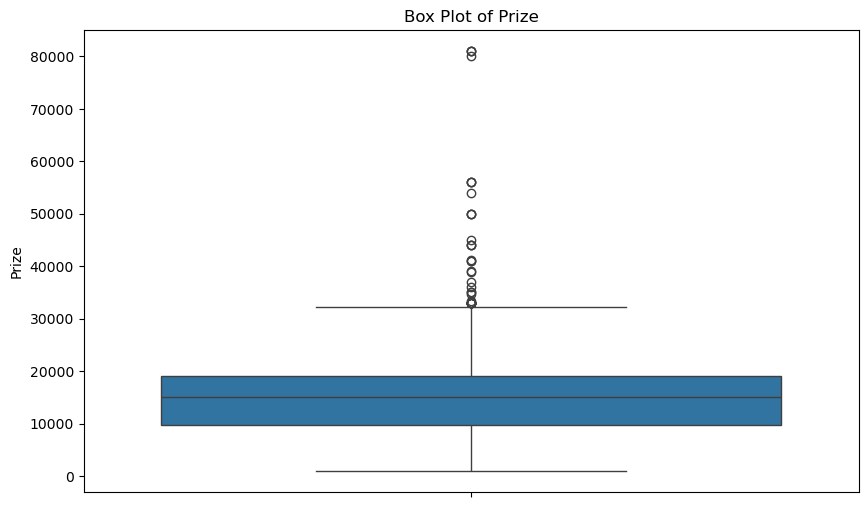

In [72]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=Processed_Flipdata, y='Prize')
plt.ylabel('Prize')
plt.title('Box Plot of Prize')
plt.show()

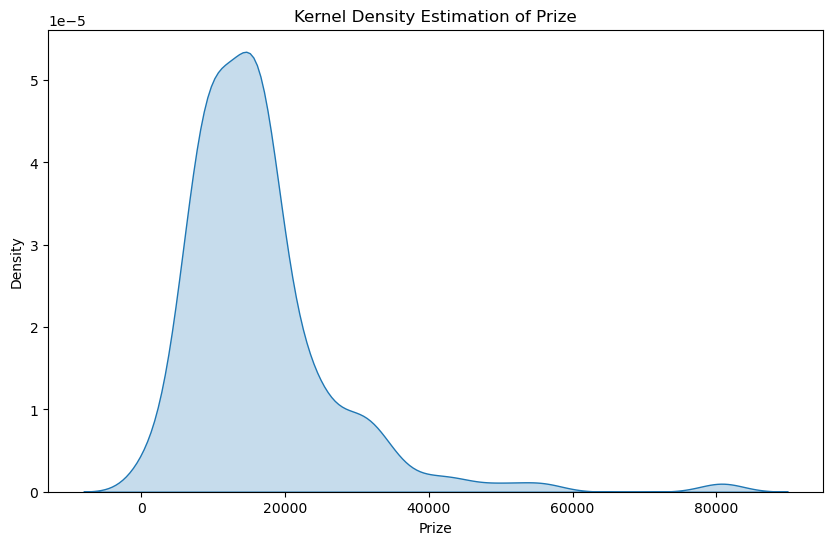

In [74]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=Processed_Flipdata['Prize'], shade=True)
plt.xlabel('Prize')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Prize')
plt.show()

In [76]:
def iqr_technique(DFcolumn):
  Q1 = np.percentile(DFcolumn, 25)
  Q3 = np.percentile(DFcolumn, 75)
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)                        

  return lower_range,upper_range

In [78]:
lower_bound,upper_bound = iqr_technique(Processed_Flipdata['Prize'])

Processed_Flipdata = Processed_Flipdata[(Processed_Flipdata.Prize>lower_bound) & (Processed_Flipdata.Prize<upper_bound)]

In [80]:
lower_bound, upper_bound = iqr_technique(Processed_Flipdata['Front Camera'])

Processed_Flipdata = Processed_Flipdata[(Processed_Flipdata['Front Camera'] > lower_bound) & (Processed_Flipdata['Front Camera'] < upper_bound)]

In [82]:
Processed_Flipdata.head(5)

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13,5,1,16,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8,5,0,16,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50,5,1,16,G37,8999


In [84]:
encoding_Processed_Flipdata=pd.get_dummies(Processed_Flipdata, columns= ['Model','Colour','Processor_'],
                                           drop_first=True,dtype=int)

In [86]:
encoding_Processed_Flipdata

,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Prize,Model_I Kall Z19Pro,Model_I Kall Z19Pro Flash blue,...,Processor__Unisoc SC9863A,Processor__Unisoc SC9863A/ Unisoc SC9863A1,Processor__Unisoc Spreadtrum SC9863A1,Processor__Unisoc T606,Processor__Unisoc T610,Processor__Unisoc T612,Processor__Unisoc T612 processor,Processor__Unisoc T616,Processor__Unisoc Tiger T612 (12 nm),Processor__Unisoc Tiger T616
0,64,4,6000,13,5,1,16,7299,0,0,...,0,0,1,0,0,0,0,0,0,0
1,64,4,6000,13,5,1,16,7299,0,0,...,0,0,1,0,0,0,0,0,0,0
2,128,8,5000,50,16,0,16,11999,0,0,...,0,0,0,0,0,0,0,0,0,0
3,32,2,5000,8,5,0,16,5649,0,0,...,0,0,0,0,0,0,0,0,0,0
4,128,8,5000,50,5,1,16,8999,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,64,4,5000,50,8,0,16,9790,0,0,...,0,0,0,0,0,0,0,0,0,0
535,64,3,5000,13,5,0,16,9999,0,0,...,0,0,0,0,0,0,0,0,0,0
537,32,2,3100,5,2,0,12,5998,0,0,...,0,0,0,0,0,0,0,0,0,0
538,64,4,5000,50,8,0,16,9990,0,0,...,0,0,0,0,0,0,0,0,0,0


# 3. Feature Extraction:

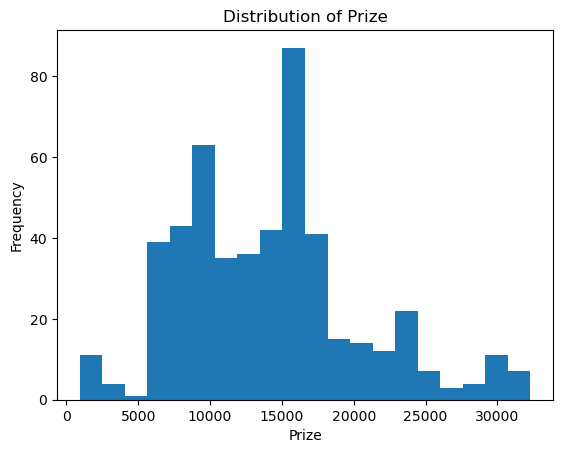

In [88]:
plt.hist(encoding_Processed_Flipdata['Prize'], bins=20)
plt.xlabel('Prize')
plt.ylabel('Frequency')
plt.title('Distribution of Prize')
plt.show()

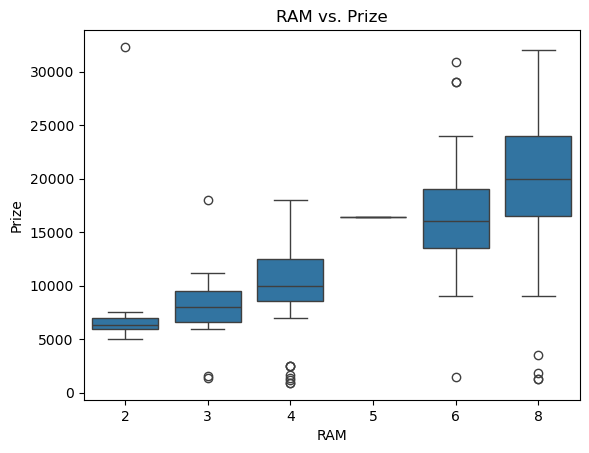

In [90]:
sns.boxplot(x='RAM', y='Prize', data=encoding_Processed_Flipdata)
plt.xlabel('RAM')
plt.ylabel('Prize')
plt.title('RAM vs. Prize')
plt.show()

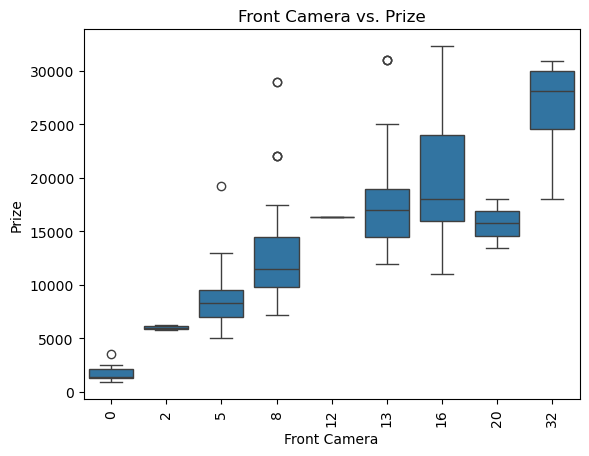

In [92]:
sns.boxplot(x='Front Camera', y='Prize', data=encoding_Processed_Flipdata)
plt.xlabel('Front Camera')
plt.ylabel('Prize')
plt.title('Front Camera vs. Prize')
plt.xticks(rotation=90)
plt.show()

In [94]:
correlation_matrix = encoding_Processed_Flipdata.corr()

In [96]:
correlation_with_target = correlation_matrix['Prize'].abs().sort_values(ascending=False)

In [98]:
correlation_with_target

Prize                                          1.000000
Front Camera                                   0.770590
RAM                                            0.691196
Memory                                         0.664760
Rear Camera                                    0.614137
                                                 ...   
Processor__Qualcomm Snapdragon 680 (SM6225)    0.000338
Colour_Marine Blue                             0.000298
Colour_Space Black                             0.000165
Model_SAMSUNG Galaxy F14 5G                    0.000012
Processor__Exynos 1330, Octa Core              0.000012
Name: Prize, Length: 534, dtype: float64

In [100]:
highly_correlated_features = correlation_with_target[correlation_with_target > 0.5].index.tolist()

In [102]:
highly_correlated_features

['Prize', 'Front Camera', 'RAM', 'Memory', 'Rear Camera']

In [104]:
from sklearn.ensemble import RandomForestRegressor

In [106]:
X = encoding_Processed_Flipdata.drop('Prize', axis=1)
y = encoding_Processed_Flipdata['Prize']

In [108]:
rf_model = RandomForestRegressor()

In [110]:
rf_model.fit(X, y)

RandomForestRegressor()

In [112]:
feature_importances = rf_model.feature_importances_

In [114]:
important_features_rf = X.columns[feature_importances > 0.05]

In [116]:
important_features_rf

Index(['Memory', 'RAM', 'Battery_', 'Rear Camera', 'Front Camera'], dtype='object')

In [118]:
from sklearn.ensemble import GradientBoostingRegressor

In [120]:
gb_model = GradientBoostingRegressor()

In [122]:
gb_model.fit(X, y)

GradientBoostingRegressor()

In [124]:
feature_importances = gb_model.feature_importances_

In [126]:
important_features_gb = X.columns[feature_importances > 0.01]

In [128]:
important_features_gb

Index(['Memory', 'RAM', 'Battery_', 'Rear Camera', 'Front Camera',
       'Model_REDMI Note 12 Pro 5G', 'Model_realme GT 2',
       'Processor__Dimensity 1080, Octa Core ', 'Processor__Google Tensor'],
      dtype='object')

In [130]:
from sklearn.preprocessing import StandardScaler

In [132]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [134]:
from sklearn.decomposition import PCA

In [136]:
n_components = 5
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [138]:
X_pca

array([[ 2.69448396, -5.12355324,  8.24457529,  5.39280954,  1.3004656 ],
       [ 2.69443403, -5.12342674,  8.24486606,  5.3932759 ,  1.30241816],
       [-1.61089756,  0.08917184, -0.75840745, -0.03372013, -0.55642887],
       ...,
       [ 5.14564146,  2.83368268, -0.12655336, -1.97883949, -0.63588553],
       [ 1.26269992, -1.3359574 ,  0.03073298,  0.87177523, -1.9768059 ],
       [ 0.55730873, -0.10454454, -0.37496709,  1.60649408, -0.22423873]])

In [140]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [0.01017388 0.00789423 0.00673184 0.0057658  0.00566921]


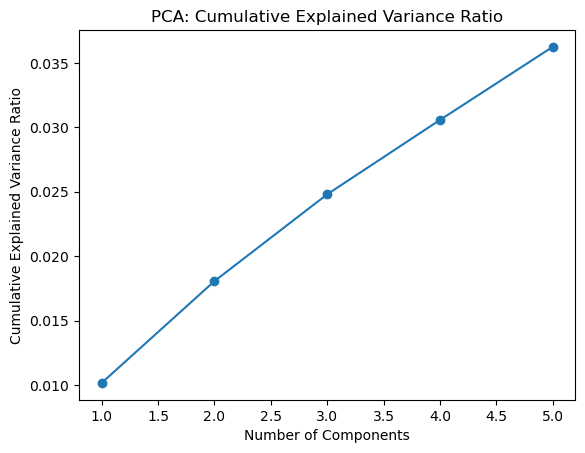

In [142]:
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(cumulative_variance_ratio)+1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA: Cumulative Explained Variance Ratio')
plt.show()

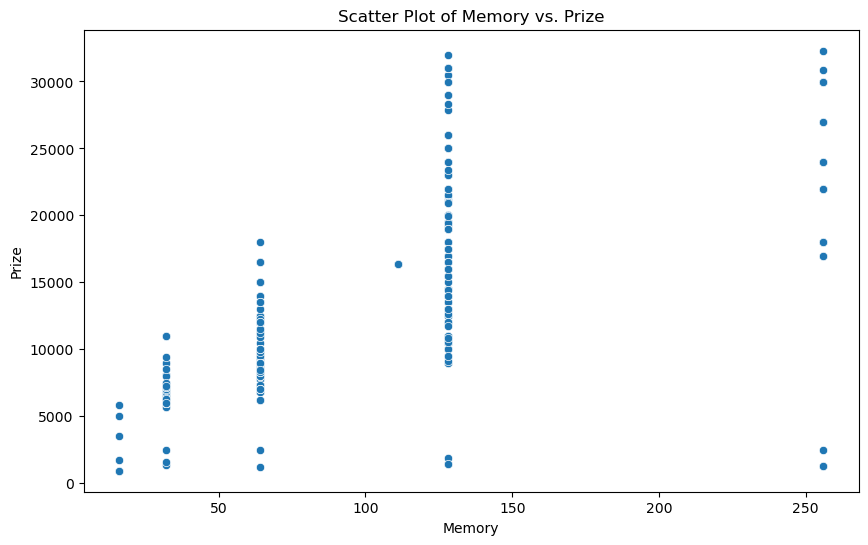

In [144]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Memory', y='Prize', data=encoding_Processed_Flipdata)
plt.xlabel('Memory')
plt.ylabel('Prize')
plt.title('Scatter Plot of Memory vs. Prize')
plt.show()

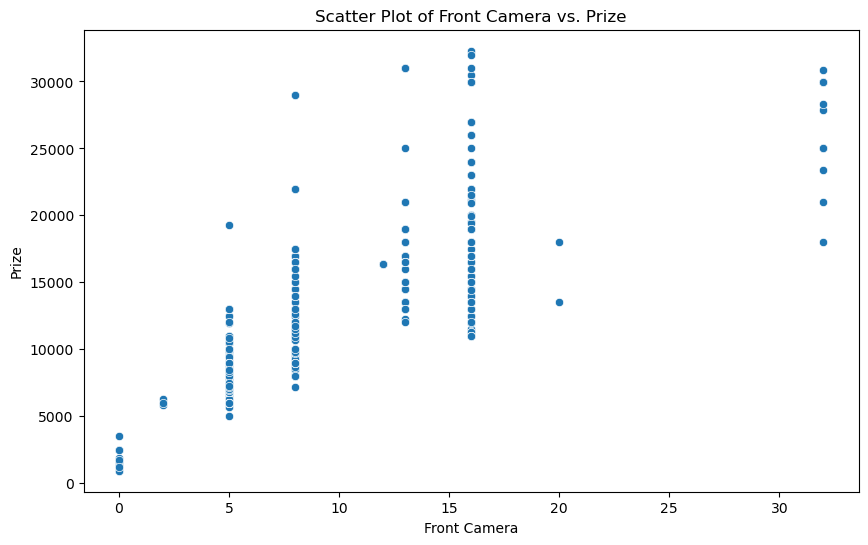

In [146]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Front Camera', y='Prize', data=encoding_Processed_Flipdata)
plt.xlabel('Front Camera')
plt.ylabel('Prize')
plt.title('Scatter Plot of Front Camera vs. Prize')
plt.show()

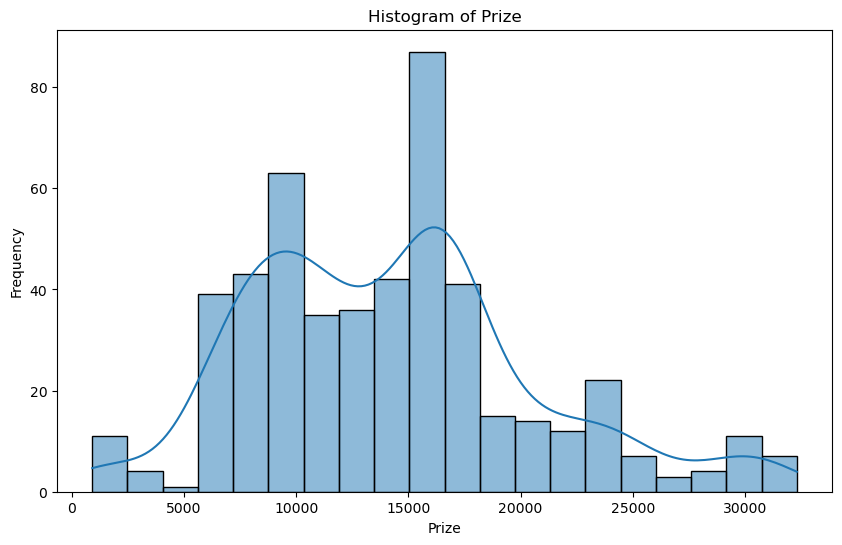

In [148]:
plt.figure(figsize=(10, 6))
sns.histplot(encoding_Processed_Flipdata['Prize'], bins=20, kde=True)
plt.xlabel('Prize')
plt.ylabel('Frequency')
plt.title('Histogram of Prize')
plt.show()

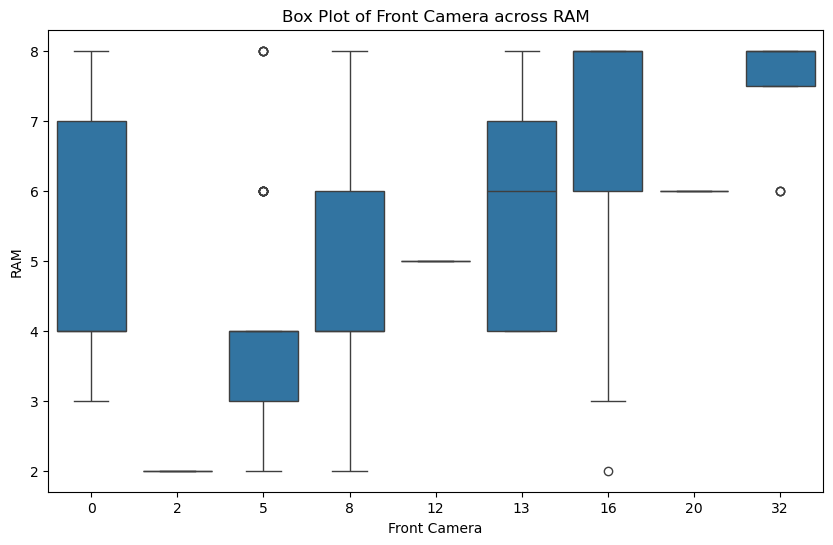

In [150]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Front Camera', y='RAM', data=encoding_Processed_Flipdata)
plt.xlabel('Front Camera')
plt.ylabel('RAM')
plt.title('Box Plot of Front Camera across RAM')
plt.show()

In [152]:
columns = ['Prize', 'Front Camera', 'RAM', 'Memory', 'Rear Camera']
corr_matrix = encoding_Processed_Flipdata[columns].corr()

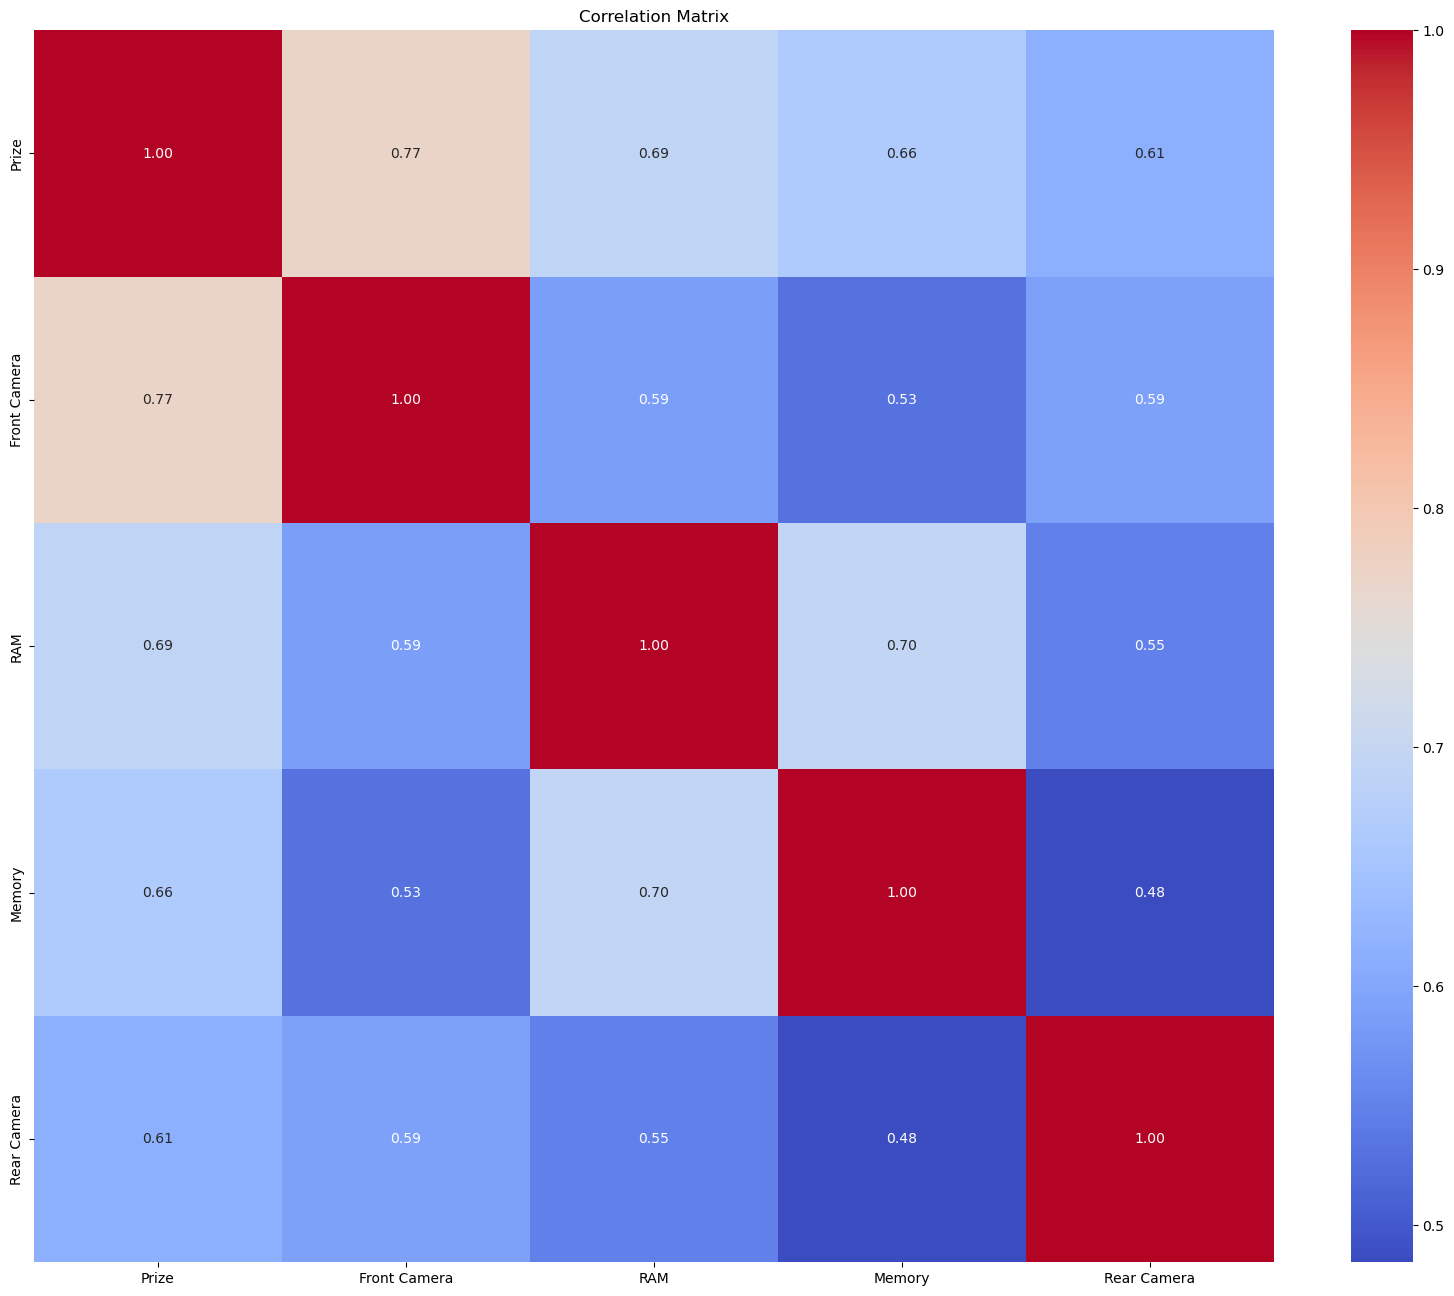

In [154]:
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

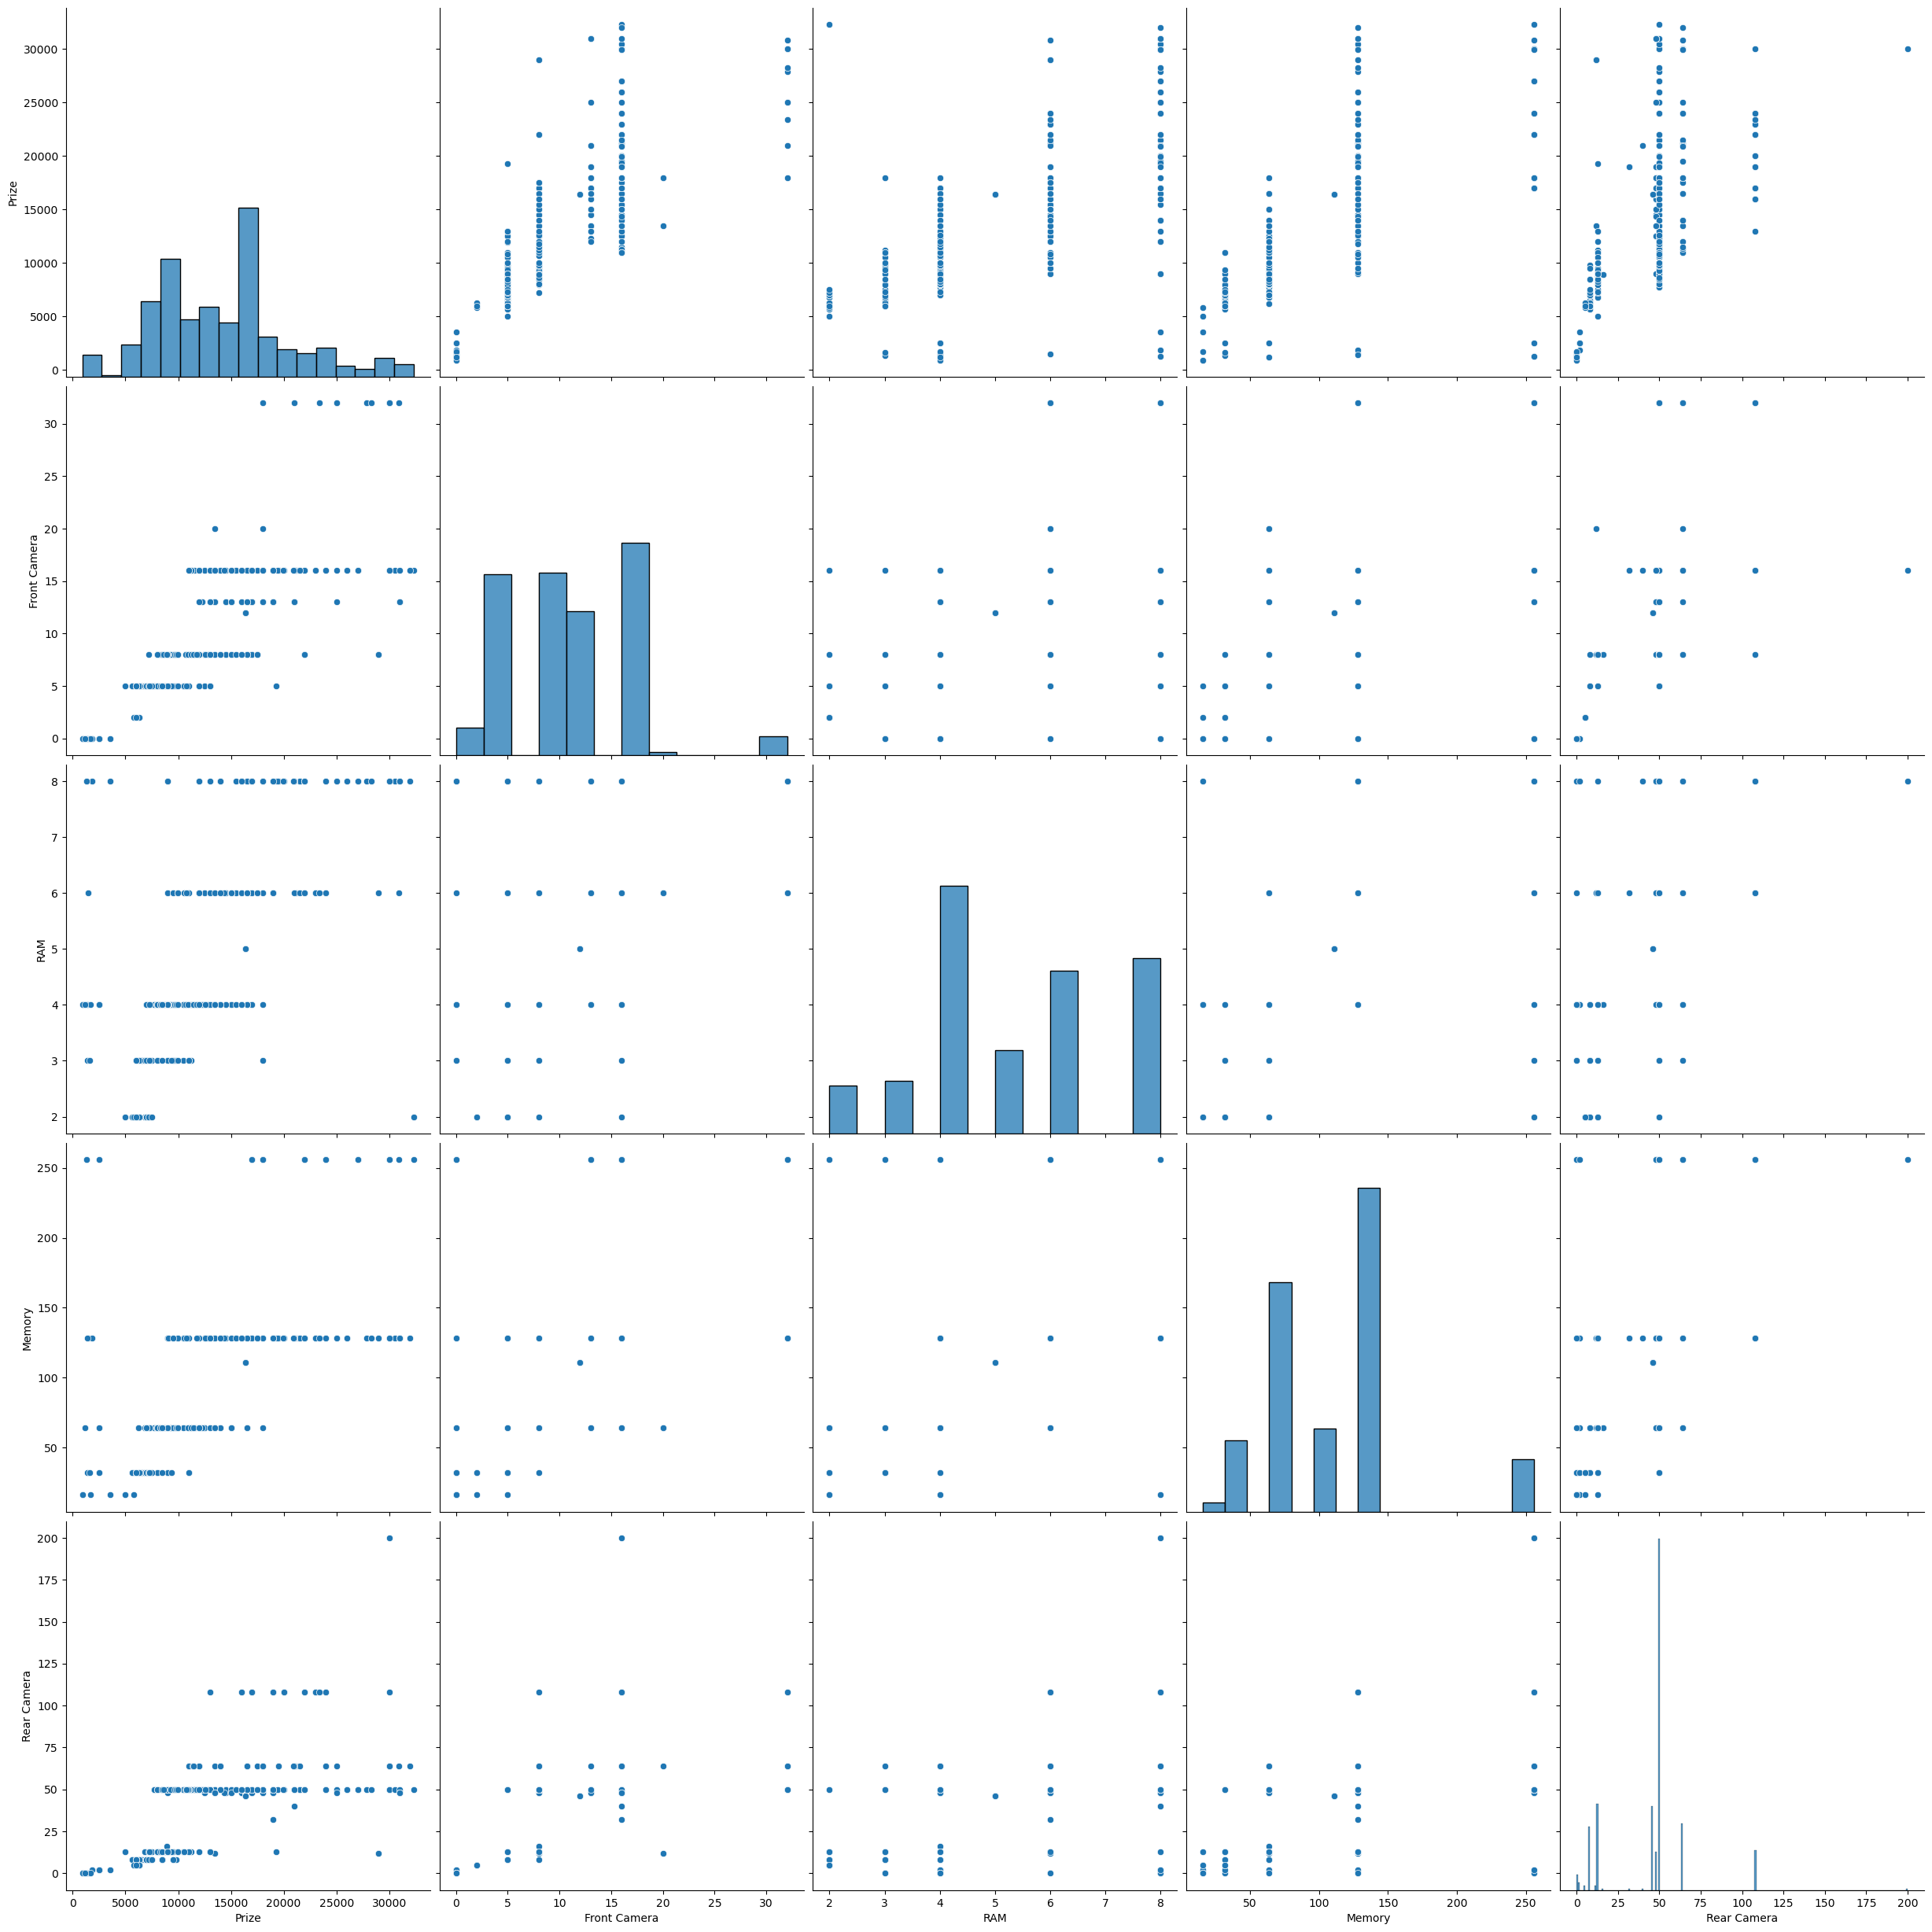

In [156]:
sns.pairplot(encoding_Processed_Flipdata[['Prize', 'Front Camera', 'RAM', 'Memory', 'Rear Camera']], height=5)
plt.show()

In [158]:
from scipy.stats import f_oneway

In [160]:
groups = [encoding_Processed_Flipdata[encoding_Processed_Flipdata['Front Camera'] == value]['Prize'] for value in encoding_Processed_Flipdata['Front Camera'].unique()]

# Perform ANOVA
f_statistic, p_value = f_oneway(*groups)
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

F-Statistic: 109.32205222471372
P-Value: 1.0240304939079723e-103


In [162]:
highly_correlated_features

['Prize', 'Front Camera', 'RAM', 'Memory', 'Rear Camera']

In [166]:
important_features_rf

Index(['Memory', 'RAM', 'Battery_', 'Rear Camera', 'Front Camera'], dtype='object')

In [168]:
highly_correlated_features_set = set(highly_correlated_features)
important_features_rf_set = set(important_features_rf)

In [170]:
relevant_features_set = highly_correlated_features_set.union(important_features_rf_set)

In [172]:
relevant_features = list(relevant_features_set)

In [174]:
relevant_features

['RAM', 'Battery_', 'Memory', 'Rear Camera', 'Front Camera', 'Prize']

# 4. Model Building:

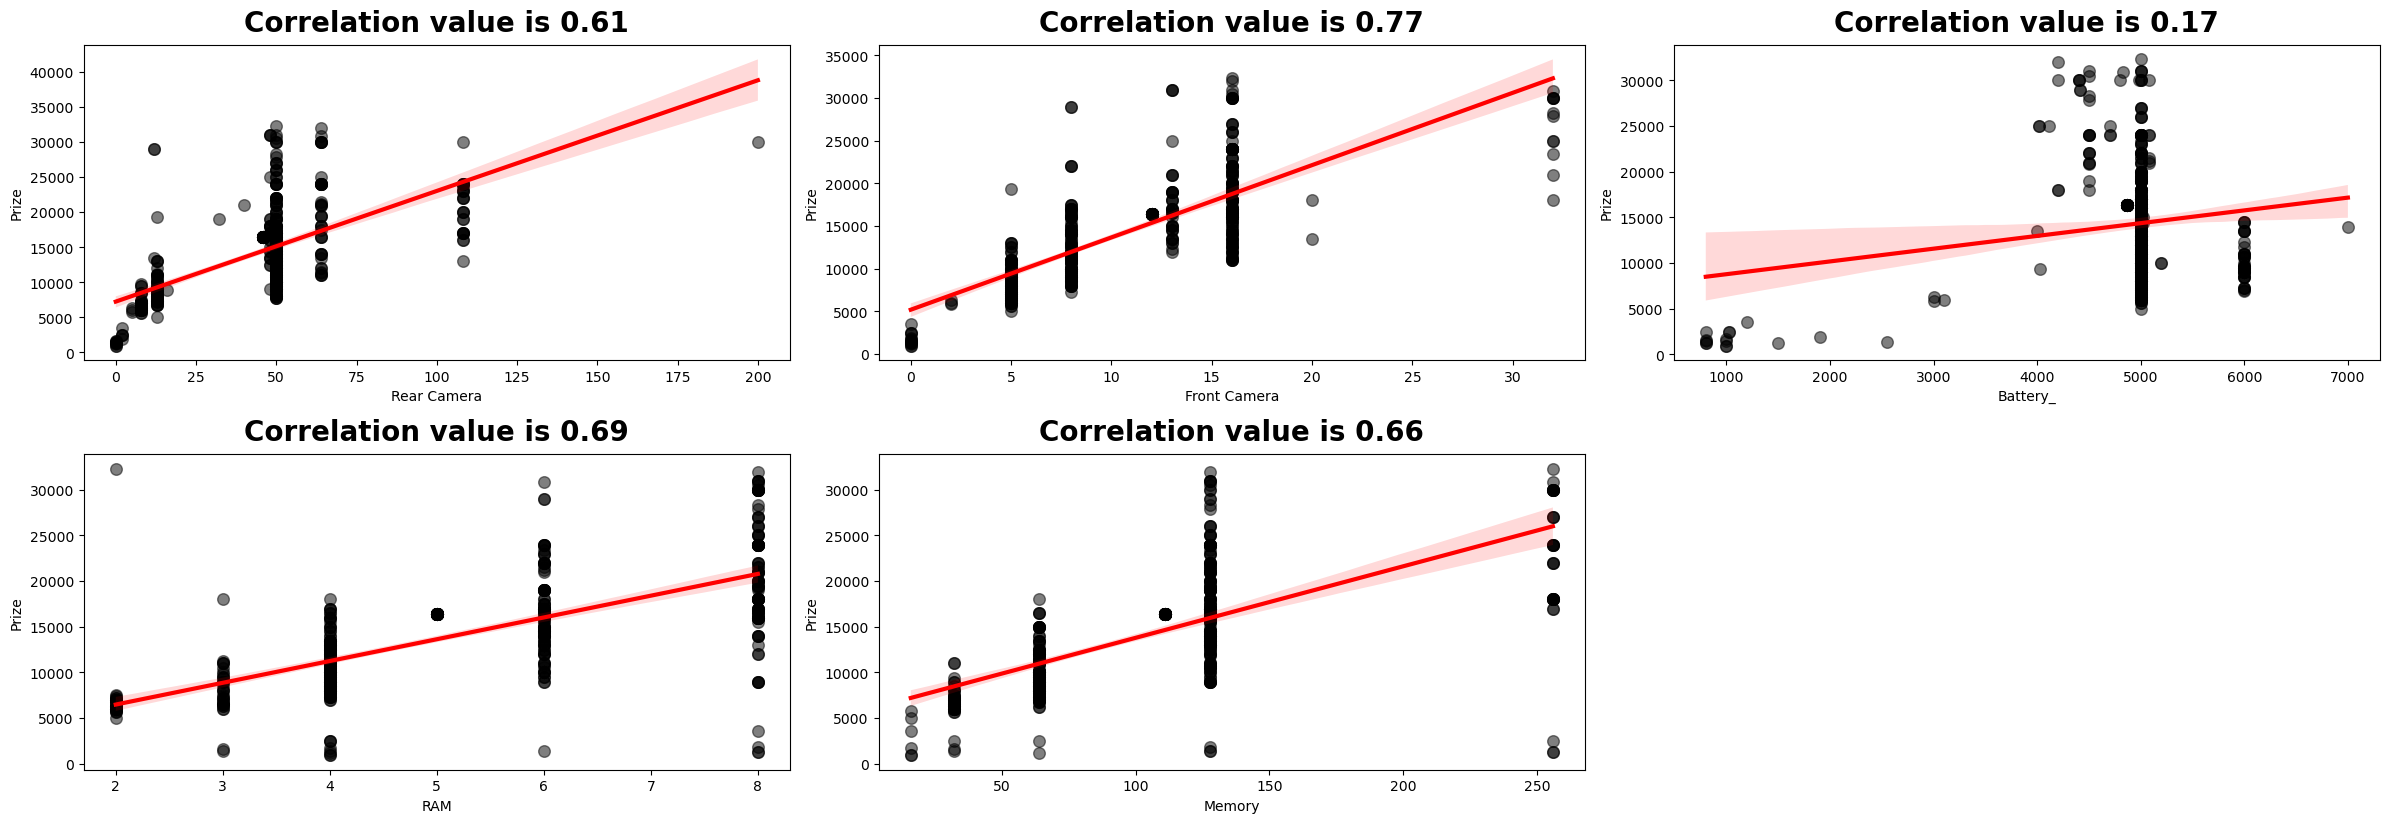

In [176]:
cols = ['Rear Camera','Front Camera','Battery_','RAM','Memory']

plt.figure(figsize=(24, 12))
for index, column in enumerate(cols):
    plt.subplot(3, 3, index + 1)
    sns.regplot(x=encoding_Processed_Flipdata[column], y=encoding_Processed_Flipdata["Prize"],
                color="black", scatter_kws={'s': 70, 'alpha': 0.5}, line_kws={'color': 'red', 'lw': 3})
    corr = round(encoding_Processed_Flipdata[[column, "Prize"]].corr()["Prize"][0], 2)
    plt.title(f"Correlation value is {corr}", pad=10, size=20, fontweight="black")
plt.tight_layout()
plt.show()

In [178]:
from sklearn.model_selection import train_test_split

In [180]:
X = encoding_Processed_Flipdata[['Rear Camera','Battery_','Front Camera','RAM','Memory']]
Y = encoding_Processed_Flipdata[['Prize']]

In [182]:
# X = encoding_Processed_Flipdata.drop('Prize',axis=1)
# Y = encoding_Processed_Flipdata['Prize']

In [184]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [186]:
X_train

,Rear Camera,Battery_,Front Camera,RAM,Memory
56,50,5000,8,4,64
229,13,6000,8,4,64
285,50,5000,8,4,128
524,48,5000,16,4,64
220,50,5000,16,6,128
...,...,...,...,...,...
106,8,5000,5,3,32
274,108,5000,16,6,128
362,8,5000,5,2,32
466,5,3000,2,2,32


In [188]:
X_test

,Rear Camera,Battery_,Front Camera,RAM,Memory
523,48,5000,16,4,64
73,8,5000,5,2,32
233,46,4864,12,5,111
175,108,5000,16,8,256
240,13,6000,8,4,128
...,...,...,...,...,...
250,0,1500,0,4,64
401,50,5000,8,6,128
19,46,4864,12,5,111
334,50,5000,8,4,64


In [190]:
Y_train

,Prize
56,12499
229,8499
285,15999
524,13499
220,23999
...,...
106,6299
274,16999
362,5999
466,6299


In [192]:
Y_test

,Prize
523,13499
73,6299
233,16390
175,23999
240,10999
...,...
250,1199
401,21999
19,16390
334,8449


In [194]:
from sklearn.preprocessing import StandardScaler

In [196]:
scaler = StandardScaler()

In [198]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [200]:
X_train_scaled

array([[ 0.18327002,  0.13832616, -0.50771929, -0.71953534, -0.803023  ],
       [-1.30817228,  1.45127711, -0.50771929, -0.71953534, -0.803023  ],
       [ 0.18327002,  0.13832616, -0.50771929, -0.71953534,  0.38903171],
       ...,
       [-1.50971854,  0.13832616, -1.0167207 , -1.82032737, -1.39905036],
       [-1.63064629, -2.48757573, -1.52572211, -1.82032737, -1.39905036],
       [ 2.52120661,  0.13832616,  0.8496178 ,  1.48204871,  0.38903171]])

In [202]:
X_test_scaled

array([[ 0.10265152,  0.13832616,  0.8496178 , -0.71953534, -0.803023  ],
       [-1.50971854,  0.13832616, -1.0167207 , -1.82032737, -1.39905036],
       [ 0.02203302, -0.04023517,  0.17094926, -0.16913933,  0.07239218],
       [ 2.52120661,  0.13832616,  0.8496178 ,  1.48204871,  2.77314113],
       [-1.30817228,  1.45127711, -0.50771929, -0.71953534,  0.38903171],
       [ 0.02203302, -0.04023517,  0.17094926, -0.16913933,  0.07239218],
       [-1.83219255, -5.37606781, -1.86505639,  1.48204871,  2.77314113],
       [ 0.02203302, -0.04023517,  0.17094926, -0.16913933,  0.07239218],
       [ 0.18327002,  0.13832616,  0.8496178 ,  1.48204871,  2.77314113],
       [ 0.18327002,  0.13832616, -1.0167207 , -0.71953534, -0.803023  ],
       [ 2.52120661,  0.13832616,  0.8496178 ,  1.48204871,  0.38903171],
       [ 0.18327002,  0.13832616,  0.8496178 ,  0.38125668,  0.38903171],
       [ 0.18327002,  0.13832616, -0.50771929,  0.38125668,  0.38903171],
       [-1.30817228,  0.13832616, -1.0

# Choose a Model:

In [204]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,accuracy_score,mean_squared_error

In [207]:
rf_model = RandomForestRegressor()

In [209]:
rf_model.fit(X_train_scaled, Y_train)

RandomForestRegressor()

In [211]:
y_pred = rf_model.predict(X_test_scaled)

In [213]:
score = r2_score(Y_test, y_pred)
print(f'Model Score: {score}')

Model Score: 0.8785138116153318


In [215]:
dt_model = DecisionTreeRegressor()

In [217]:
dt_model.fit(X_train_scaled, Y_train)

DecisionTreeRegressor()

In [219]:
y_pred1 = dt_model.predict(X_test_scaled)

In [221]:
score = r2_score(Y_test, y_pred1)
print(f'Model score: {score}')

Model score: 0.8715883529881898


In [223]:
gr_model = GradientBoostingRegressor()

In [225]:
gr_model.fit(X_train_scaled, Y_train)

GradientBoostingRegressor()

In [227]:
y_pred2 = gr_model.predict(X_test_scaled)

In [229]:
score = r2_score(Y_test, y_pred2)
print(f'Model score: {score}')

Model score: 0.8446801546275893


In [231]:
lr_model = LinearRegression()

In [233]:
lr_model.fit(X_train_scaled, Y_train)

LinearRegression()

In [235]:
y_pred3 = lr_model.predict(X_test_scaled)

In [237]:
score = r2_score(Y_test, y_pred3)
print(f'Model score: {score}')

Model score: 0.7455207182370703


# 5. Model Evaluation:

In [241]:
score = r2_score(Y_test, y_pred)
print(f'Model Score: {score}')

Model Score: 0.8785138116153318


In [243]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [245]:
rf_mae = mean_absolute_error(Y_test, y_pred)

rf_mse = mean_squared_error(Y_test, y_pred)

In [247]:
rf_mae

1269.1320535594218

In [249]:
rf_mse

5038738.352255532

In [251]:
score = r2_score(Y_test, y_pred1)
print(f'Model Score: {score}')

Model Score: 0.8715883529881898


In [253]:
dt_mae = mean_absolute_error(Y_test, y_pred1)

dt_mse = mean_squared_error(Y_test, y_pred1)

In [255]:
dt_mae

1212.508817916002

In [257]:
dt_mse

5325977.37469525

In [259]:
score = r2_score(Y_test, y_pred2)
print(f'Model Score: {score}')

Model Score: 0.8446801546275893


In [261]:
gb_mae = mean_absolute_error(Y_test, y_pred2)

gb_mse = mean_squared_error(Y_test, y_pred2)

In [264]:
gb_mae

1489.2214960673255

In [266]:
gb_mse

6442016.760508822

In [268]:
score = r2_score(Y_test, y_pred3)
print(f'Model Score: {score}')

Model Score: 0.7455207182370703


In [270]:
lr_mae = mean_absolute_error(Y_test, y_pred3)

lr_mse = mean_squared_error(Y_test, y_pred3)

In [272]:
lr_mae

2175.3797325231567

In [274]:
lr_mse

10554734.93672585

# 6. Feature Importance Analysis:

In [276]:
feature_importances_rf = rf_model.feature_importances_

In [278]:
feature_importances_rf

array([0.12107586, 0.10086087, 0.52594849, 0.13419536, 0.11791943])

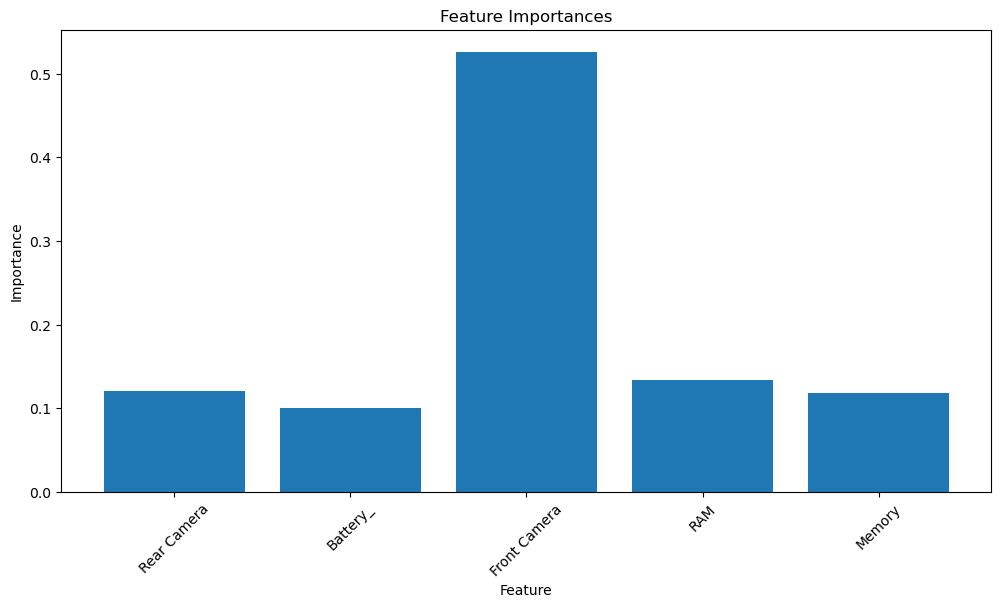

In [280]:
plt.figure(figsize=(12, 6))
plt.bar(X.columns, feature_importances_rf)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()

In [282]:
feature_importances_dt = dt_model.feature_importances_

In [284]:
feature_importances_dt

array([0.18360678, 0.07419054, 0.55137319, 0.12966245, 0.06116704])

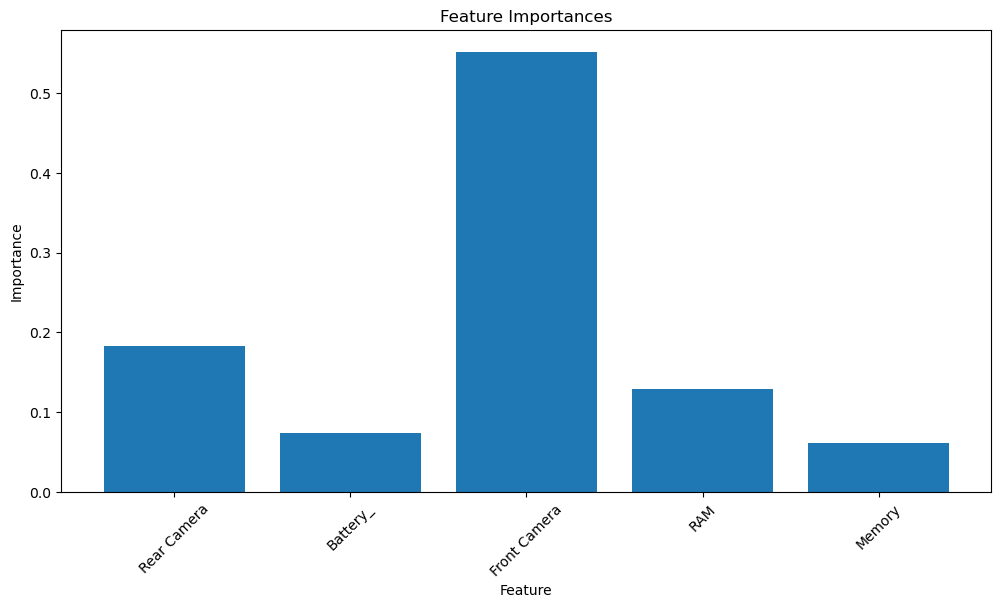

In [286]:
plt.figure(figsize=(12, 6))
plt.bar(X.columns, feature_importances_dt)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()

# 7. Report and Visualization:

# Techniques and Models Used:

# 1. Data Cleaning and Preprocessing

# 2. Exploratory Data Analysis (EDA)

# 3. Feature Importance Analysis

# 4. Model Building and Evaluation

# 5. Visualization:

# histogram

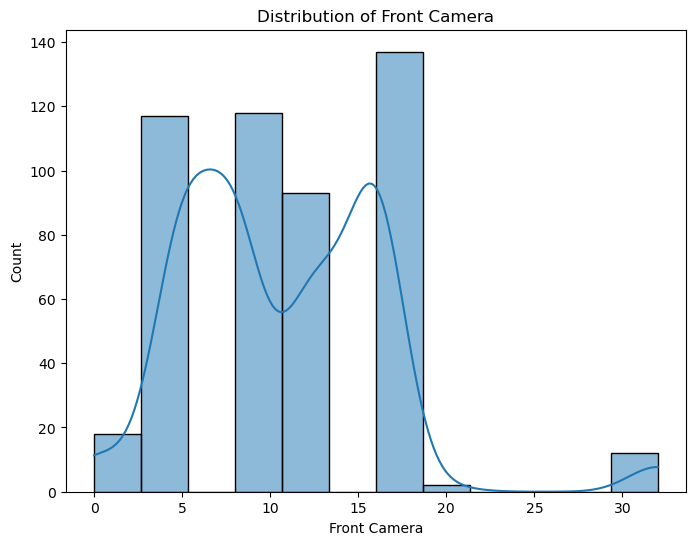

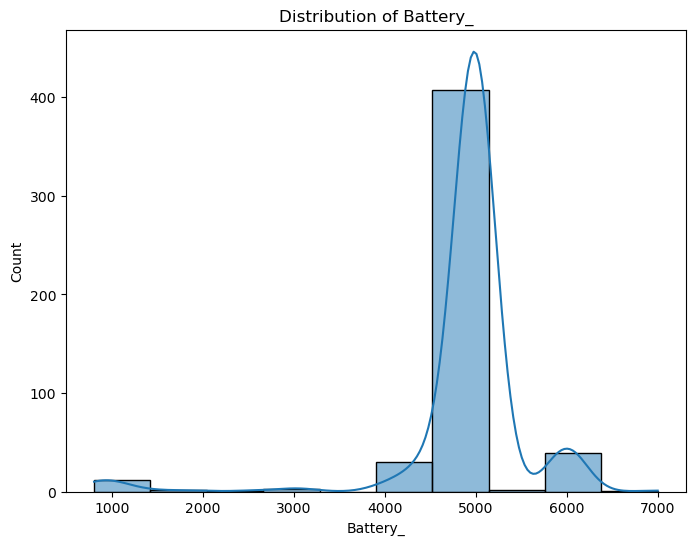

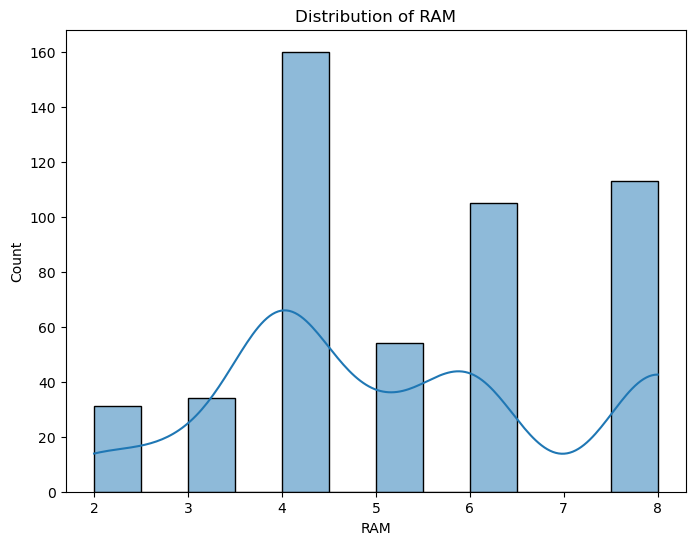

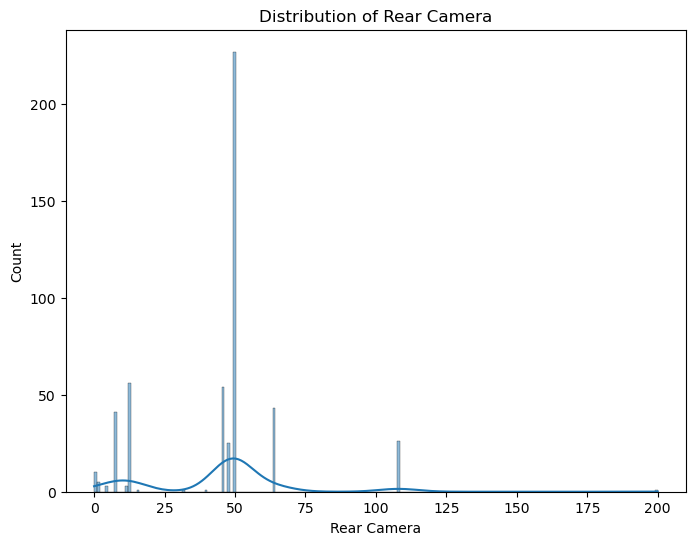

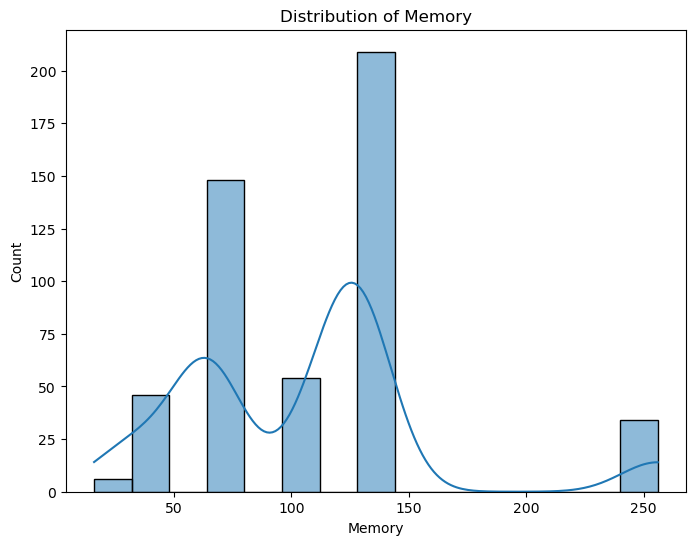

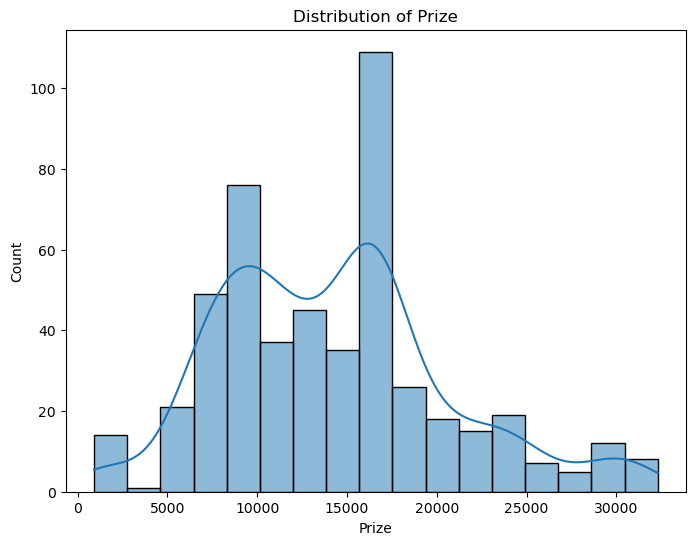

In [288]:
numeric_vars = ['Front Camera', 'Battery_', 'RAM','Rear Camera', 'Memory','Prize']
for var in numeric_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=encoding_Processed_Flipdata, x=var, kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

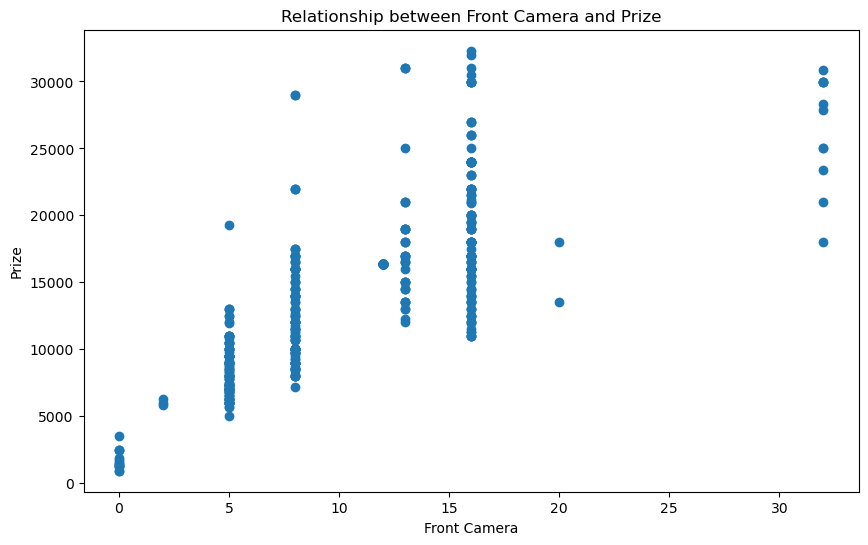

In [290]:
plt.figure(figsize=(10, 6))
plt.scatter(encoding_Processed_Flipdata['Front Camera'], encoding_Processed_Flipdata['Prize'])
plt.xlabel('Front Camera')
plt.ylabel('Prize')
plt.title('Relationship between Front Camera and Prize')
plt.show()

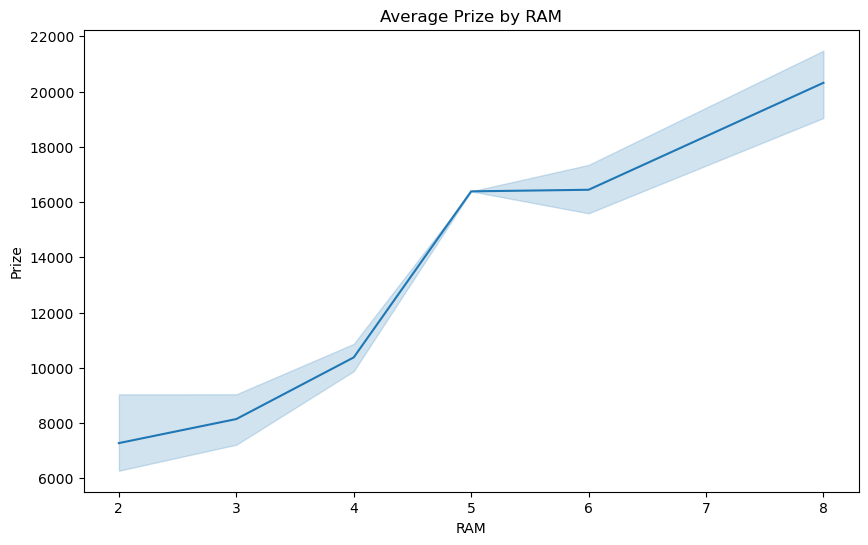

In [292]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='RAM', y='Prize', data=encoding_Processed_Flipdata)
plt.xlabel('RAM')
plt.ylabel('Prize')
plt.title('Average Prize by RAM')
plt.show()

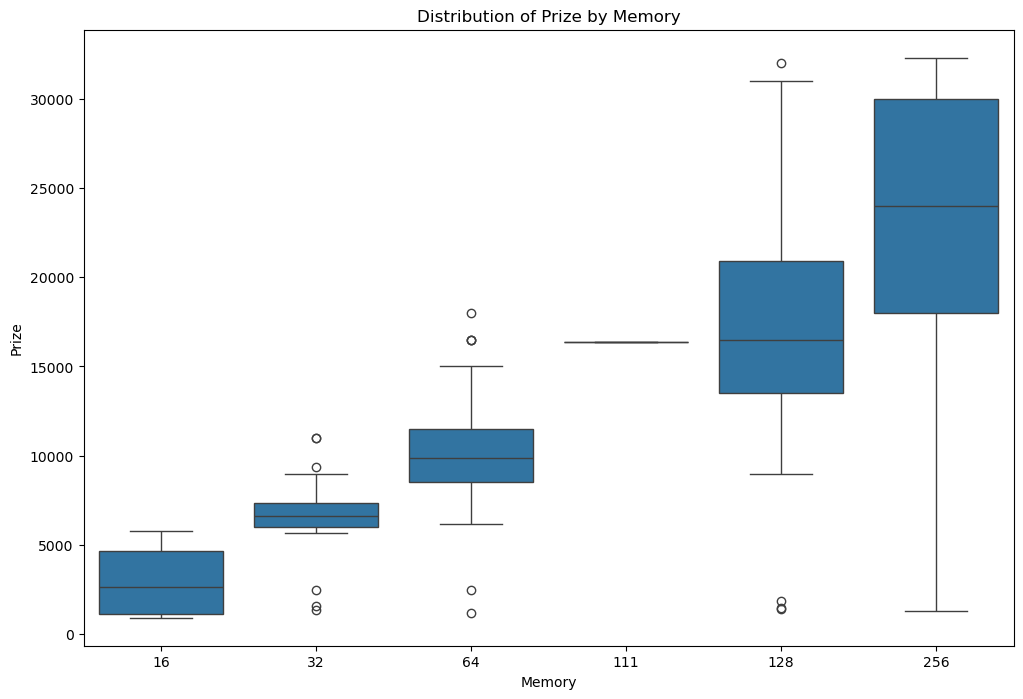

In [294]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Memory', y='Prize', data=encoding_Processed_Flipdata)
plt.xlabel('Memory')
plt.ylabel('Prize')
plt.title('Distribution of Prize by Memory')
plt.show()

# 8. Recommendations:

Based on our analysis, we recommend the following insights to the organization regarding the 
features that have the most significant influence on mobile phone prices:

# 1. Front Camera , Memory and RAM

# 2. Processor Type

# 3. Camera Specifications

# 4. Battery Capacity

# 5. AI Lens and Other Advanced Features

# 6. Conclusion:

1. Features like Front Camera , Memory and RAM are having strong relation with the target variable.

2. The best performing model is Random Forest Regressor Model with highest R2 & Adjusted_R2 Scores.

3. The second  best performing model is Gradient Boosting Regressor Model.

4. The stacked model performance was impressive becuase of hight accuracy and low error rates.

5. The project developed a phones price prediction model with strong performance metrics.

6. The project effectively addresses the task of phone price prediction and contributes as a valuable tool in the dynamic real estate industry.

In [296]:
encoding_Processed_Flipdata.to_excel("encoding_Processed_Flipdata.xlsx")